In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from ase.visualize import view
from ase.io import read, write
import ase
import pandas as pd
import numpy as np

In [3]:
from Smile import conformers_from_smile
from Smile import _reset_rotation, _reset_position

from Surf import NEW_get_shrinkwrap_ads_sites

In [4]:
for n in [100, 1000, 10000]:
    t1 = datetime.datetime.utcnow() 
    xx = conformers_from_smile('ClCC',n)
    t2 = datetime.datetime.utcnow() 
    print(n, t2-t1)

100 0:00:00.144807
1000 0:00:00.906891
10000 0:00:09.830771


In [5]:
for n in [100, 1000, 10000]:
    t1 = datetime.datetime.utcnow() 
    xx = conformers_from_smile('ClCC',n)
    for x in xx:
        x = _reset_rotation(x)
        x = _reset_position(x)
    t2 = datetime.datetime.utcnow() 
    print(n, t2-t1)

100 0:00:00.124092
1000 0:00:01.064846
10000 0:00:11.686249


In [6]:
conformers_from_smile?

Signature: conformers_from_smile(smiles, conformer_count=10, randomSeed=61453)
Docstring: <no docstring>
File:      ~/git/autoadsorbate/autoadsorbate/Smile.py
Type:      function

In [7]:
from autoadsorbate import Fragment
from ase.build import fcc111

In [8]:
f = Fragment('ClOCC')

In [9]:
f.get_conformer(0)

Atoms(symbols='ClOC2H5', pbc=True, cell=[10.0, 10.0, 10.0])

In [380]:
# atoms = read(
#     '/gpfs/projects/qm_inorganics/calculations_q2/block_2023-07-20-12-21-08-326430/launcher_2023-07-25-07-23-24-714784/launcher_2023-07-25-09-30-20-367625/qe_16532870.pbsp1/pw.out',
#     index = -1
# )
atoms = fcc111("Cu", size=(3,3,4), a=3.66, vacuum=16, periodic=True)

In [381]:
view(atoms)

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [441]:
Surface?

Init signature: Surface(atoms, precision=0.25, touch_sphere_size=3)
Docstring:      base class for initializing a reactive surface
Init docstring: Initialize attributes.
File:           ~/git/autoadsorbate/autoadsorbate/autoadsorbate.py
Type:           type
Subclasses:     ActiveSite

In [5]:
from autoadsorbate import Surface
from ase.build import fcc111

atoms = fcc111("Cu", size=(5,5,4), a=3.66, vacuum=16, periodic=True)

S = Surface(atoms)
print('\nAll sites:\n')
print(S.site_dict)
S.sym_reduce()
print('\nreduced sites:\n')
print(S.site_dict)


All sites:

{'coordinates': [array([ 1.29400541,  2.24128311, 22.33930596]), array([10.35204328,  8.96513246, 22.33930596]), array([14.23405951,  6.72384934, 22.33930596]), array([11.64604869,  2.24128311, 22.33930596]), array([ 6.47002705,  2.24128311, 22.33930596]), array([ 6.47002705,  6.72384934, 22.33930596]), array([ 5.17602164,  8.96513246, 22.33930596]), array([ 3.88201623,  6.72384934, 22.33930596]), array([12.9400541 ,  4.48256623, 22.33930596]), array([10.35204328,  0.        , 22.33930596]), array([ 9.05803787,  6.72384934, 22.33930596]), array([11.64604869,  6.72384934, 22.33930596]), array([ 7.76403246,  0.        , 22.33930596]), array([ 7.76403246,  8.96513246, 22.33930596]), array([ 2.58801082,  4.48256623, 22.33930596]), array([ 2.58801082,  0.        , 22.33930596]), array([ 9.05803787,  2.24128311, 22.33930596]), array([ 7.76403246,  4.48256623, 22.33930596]), array([15.52806491,  8.96513246, 22.33930596]), array([12.9400541 ,  8.96513246, 22.33930596]), array([ 5.

In [7]:
S.view_surface()

visualizing surface Cu atoms as Zn


In [8]:
# for i in S.site_df.index.values:
#     print(i, SEC.compare(S.atoms+S.get_site(0), S.atoms+S.get_site(i)))
#     print(i, compare_sites(S.atoms, 0, i))

## Active_site

In [9]:
pwd

'/gpfs/users/home/fakoed/git/autoadsorbate/autoadsorbate'

In [10]:
from autoadsorbate import ActiveSite

In [11]:
view(atoms)

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [12]:
AS = ActiveSite(atoms, must_include=[87],must_exclude=[], keep_tops=True)

In [13]:
view([AS.view_site(index=i, return_atoms=True) for i in AS.site_df.index.values])

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [107]:
import seaborn as sns

<Axes: ylabel='Count'>

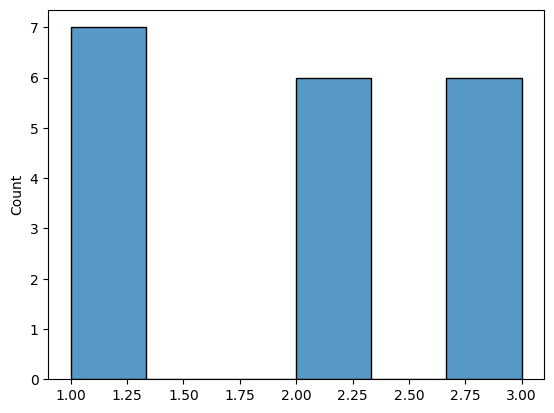

In [108]:
sns.histplot(AS.site_df.connectivity.values)

In [50]:
S = Surface(atoms)

In [70]:
if np.sum([True, False]):
    print('a')

a


In [100]:
['b','a'] == ['a','b']

False

In [52]:
S?

Type:           Surface
String form:    <autoadsorbate.Surface object at 0x7fcbcd17e010>
File:           ~/git/autoadsorbate/autoadsorbate/autoadsorbate.py
Docstring:      base class for initializing a reactive surface
Init docstring: Initialize attributes.

## Intermediate

In [ ]:
Intermediate(ActiveSite, fragments=[], n_vector_sigma=0.3, rotate=True)

## Reaction

In [143]:
A = Fragment('CCCCC')

In [148]:
view([A.get_conformer(0, rot_deg=d) for d in [0,30,60]])

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [147]:
Reaction(ActiveSite, [])

Atoms(symbols='Cu36', pbc=[True, True, False], cell=[[7.764032457428293, 0.0, 0.0], [3.8820162287141464, 6.723849343939824, 0.0], [0.0, 0.0, 38.339305955702095]], tags=...)

## misc

In [22]:
from autoadsorbate import Surface
from ase.build import fcc111

atoms = fcc111("Cu", size=(5,5,4), a=3.66, vacuum=16, periodic=True)

In [15]:
view(atoms)

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [23]:
# S.view_surface()

In [48]:
S = Surface(atoms)

In [49]:
S.sym_reduce()

In [55]:
S.sym_reduce?

Signature: S.sym_reduce()
Docstring: <no docstring>
File:      ~/git/autoadsorbate/autoadsorbate/autoadsorbate.py
Type:      method

In [54]:
S.site_dict

{'coordinates': [array([ 0.        ,  0.        , 22.33930596]),
  array([ 0.6470027 ,  1.12064156, 22.33930596]),
  array([ 1.29400541,  0.74709437, 22.33930596]),
  array([ 2.58801082,  1.49418874, 22.33930596])],
 'connectivity': [1, 2, 3, 3],
 'topology': [[75], [75, 80], [75, 76, 80], [76, 80, 81]],
 'n_vector': [array([-0.01421595,  0.00575572,  0.99988238]),
  array([ 0.00275291, -0.00988683,  0.99994733]),
  array([-0.01264909, -0.00235465,  0.99991722]),
  array([-0.01633954,  0.006013  ,  0.99984842])],
 'h_vector': [array([1., 0., 0.]),
  [-0.5000000000000002, -0.8660254037844386, 0.0],
  [-0.5000000000000002, -0.8660254037844386, 0.0],
  [-0.4999999999999999, 0.8660254037844387, 0.0]],
 'site_formula': [{'Cu': 1}, {'Cu': 2}, {'Cu': 3}, {'Cu': 3}]}

In [53]:
# S.site_df[S.site_df.connectivity==1]

## Active_site

In [37]:
import seaborn as sns

In [31]:
from autoadsorbate import ActiveSite

In [34]:
view(atoms)

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [46]:
AS = ActiveSite(atoms, must_include=[87],must_exclude=[], keep_tops=False)

In [47]:
AS.view_surface()

visualizing surface Cu atoms as Zn


In [44]:
# AS.view_site(AS.site_df.index.values[0])

In [45]:
view([AS.view_site(index=i, return_atoms=True) for i in AS.site_df.index.values])

<Popen: returncode: None args: ['/gpfs/users/home/desa/miniconda3/envs/edelw...>

In [39]:
# sns.histplot(AS.site_df.connectivity)

In [33]:
AS.view_surface()

visualizing surface Cu atoms as Zn


In [107]:
import seaborn as sns

<Axes: ylabel='Count'>

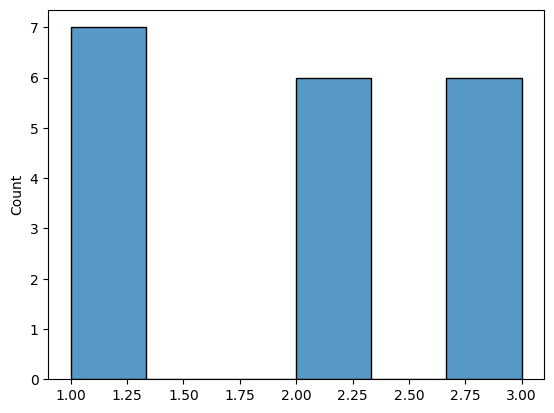

In [108]:
sns.histplot(AS.site_df.connectivity.values)

In [50]:
S = Surface(atoms)

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [64]:
svm.SVC?

Init signature:
svm.SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see

ValueError: n_features must be equal to 2. Got 3 instead.

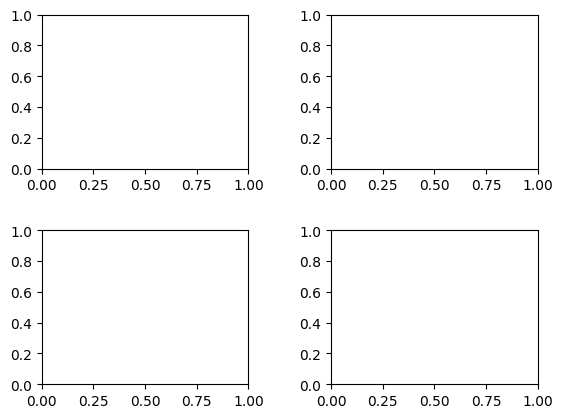

In [63]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :3]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [66]:
import pandas as pd

In [81]:
XX = iris.data[5:, :3]

In [82]:
XX

array([[5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.6, 1.4],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3, 1.3],
       [4.4, 3.2, 1.3],
       [5. , 3.5, 1.6],
       [5.1, 3.8, 1.9],
       [4.8, 3. , 1.4],
       [5.1, 3.8

In [83]:
X_test = pd.DataFrame(XX, columns=['a','b','c'])
X_train = pd.DataFrame(X, columns=['a','b','c'])
y_train = pd.DataFrame(y, columns=['d'])

In [86]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_train, y_train)))
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 1.0000


/gpfs/users/home/desa/miniconda3/envs/edelweiss0.4/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

